In [1]:
from experiment import Experiment
import torch
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['A2','A3','A8','A11','A14','A15'],
    categorical_vars = ['A1','A4','A5','A6','A7','A9','A10','A12','A13'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/credit1.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=1e-3,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [16]:
exp.data.shape

(654, 16)

In [17]:
%time clustering_scores = exp.test_clustering_performance()

#Init Bin = 10
Learned #Bin by Variables = [2, 5, 3, 2, 3, 2]
#Init Bin = 15
Learned #Bin by Variables = [2, 8, 3, 2, 10, 2]
#Init Bin = 20
Learned #Bin by Variables = [9, 17, 16, 2, 15, 4]
CPU times: user 2min 6s, sys: 36.2 s, total: 2min 42s
Wall time: 2min 5s


In [18]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 48, NMI = 0.0257
agglomerative, #Cols = 48, NMI = 0.0304


In [19]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 48, NMI = 0.1483
agglomerative, #Cols = 48, NMI = 0.1020


In [20]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 54, #NMI = 0.0226
#Bins = 3, #Cols = 60, #NMI = 0.0226
#Bins = 4, #Cols = 66, #NMI = 0.0226
#Bins = 5, #Cols = 72, #NMI = 0.0226
#Bins = 6, #Cols = 78, #NMI = 0.0226
#Bins = 7, #Cols = 84, #NMI = 0.0226
#Bins = 8, #Cols = 90, #NMI = 0.0226
#Bins = 9, #Cols = 96, #NMI = 0.0226
#Bins = 10, #Cols = 102, #NMI = 0.0226
#Bins = 11, #Cols = 108, #NMI = 0.0226
#Bins = 12, #Cols = 114, #NMI = 0.0226
#Bins = 13, #Cols = 120, #NMI = 0.0226
#Bins = 14, #Cols = 126, #NMI = 0.0226
#Bins = 15, #Cols = 132, #NMI = 0.0226
#Bins = 16, #Cols = 138, #NMI = 0.0226
#Bins = 17, #Cols = 144, #NMI = 0.0226
#Bins = 18, #Cols = 150, #NMI = 0.2947
#Bins = 19, #Cols = 156, #NMI = 0.3004
#Bins = 20, #Cols = 162, #NMI = 0.0226
agglomerative
#Bins = 2, #Cols = 54, #NMI = 0.0258
#Bins = 3, #Cols = 60, #NMI = 0.0252
#Bins = 4, #Cols = 66, #NMI = 0.0266
#Bins = 5, #Cols = 72, #NMI = 0.0252
#Bins = 6, #Cols = 78, #NMI = 0.0122
#Bins = 7, #Cols = 84, #NMI = 0.0239
#Bins = 8, #Cols = 90, #NMI = 0.

In [21]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 53, #NMI = 0.3508
#Bins = 3, #Cols = 58, #NMI = 0.2434
#Bins = 4, #Cols = 63, #NMI = 0.3048
#Bins = 5, #Cols = 68, #NMI = 0.2445
#Bins = 6, #Cols = 72, #NMI = 0.2042
#Bins = 7, #Cols = 78, #NMI = 0.1739
#Bins = 8, #Cols = 82, #NMI = 0.1740
#Bins = 9, #Cols = 87, #NMI = 0.1693
#Bins = 10, #Cols = 92, #NMI = 0.1763
#Bins = 11, #Cols = 96, #NMI = 0.1670
#Bins = 12, #Cols = 100, #NMI = 0.1716
#Bins = 13, #Cols = 105, #NMI = 0.1670
#Bins = 14, #Cols = 110, #NMI = 0.1716
#Bins = 15, #Cols = 115, #NMI = 0.1693
#Bins = 16, #Cols = 119, #NMI = 0.1670
#Bins = 17, #Cols = 123, #NMI = 0.1670
#Bins = 18, #Cols = 129, #NMI = 0.1670
#Bins = 19, #Cols = 134, #NMI = 0.1602
#Bins = 20, #Cols = 138, #NMI = 0.1716
agglomerative
#Bins = 2, #Cols = 53, #NMI = 0.0249
#Bins = 3, #Cols = 58, #NMI = 0.2146
#Bins = 4, #Cols = 63, #NMI = 0.0249
#Bins = 5, #Cols = 68, #NMI = 0.1445
#Bins = 6, #Cols = 72, #NMI = 0.2391
#Bins = 7, #Cols = 78, #NMI = 0.0252
#Bins = 8, #Cols = 82, #NMI = 0.18

In [22]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 59, NMI = 0.2434
#Init Bins = 15, #Cols = 69, NMI = 0.2287
#Init Bins = 20, #Cols = 105, NMI = 0.2313
agglomerative
#Init Bins = 10, #Cols = 59, NMI = 0.2734
#Init Bins = 15, #Cols = 69, NMI = 0.1530
#Init Bins = 20, #Cols = 105, NMI = 0.1927


In [11]:
%time clf_scores = exp.test_classification_performance(cv=3)

ValueError: Number of features of the model must match the input. Model n_features is 48 and input n_features is 46 

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [4]:
exp.data.shape

(654, 16)

In [11]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=30, lr=1e-2, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=20)

>>> Epoch = 1, Loss = 0.2677973806858063
[16, 13, 12, 7, 12, 9] 0.66269369688
>>> Epoch = 2, Loss = 0.24052079021930695
[16, 10, 12, 5, 14, 8] 0.678323431572
>>> Epoch = 3, Loss = 0.23417729139328003
[15, 10, 12, 5, 13, 9] 0.662678887067
>>> Epoch = 4, Loss = 0.2329222410917282
[12, 10, 12, 5, 14, 9] 0.658881772576
>>> Epoch = 5, Loss = 0.23192594945430756
[17, 10, 17, 5, 17, 9] 0.680069128041
>>> Epoch = 6, Loss = 0.22721078991889954
[15, 8, 14, 6, 16, 9] 0.684870233429
>>> Epoch = 7, Loss = 0.23575375974178314
[16, 8, 14, 5, 14, 9] 0.636097210092
>>> Epoch = 8, Loss = 0.2369014322757721
[13, 13, 14, 5, 16, 7] 0.643590615479
>>> Epoch = 9, Loss = 0.2316027581691742
[17, 10, 14, 5, 15, 7] 0.641226371885
>>> Epoch = 10, Loss = 0.23259715735912323
[13, 10, 13, 4, 15, 6] 0.656178754931
>>> Epoch = 11, Loss = 0.2361060529947281
[10, 12, 16, 4, 17, 6] 0.662470236839
>>> Epoch = 12, Loss = 0.23340070247650146
[10, 12, 13, 4, 9, 6] 0.645666831659
Embedding Converged!
Learned #Bin by Variables

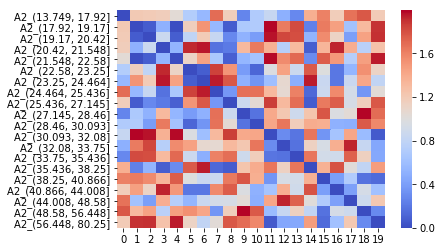

In [12]:
sb.plot_pairwise_distance_between_bins('A2')

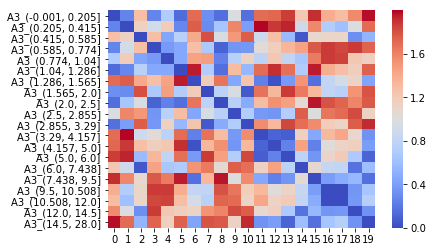

In [13]:
sb.plot_pairwise_distance_between_bins('A3')

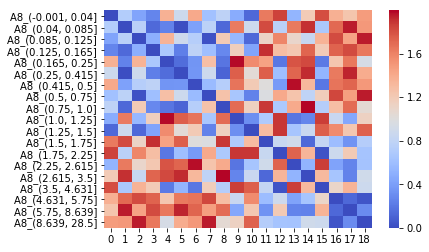

In [14]:
sb.plot_pairwise_distance_between_bins('A8')

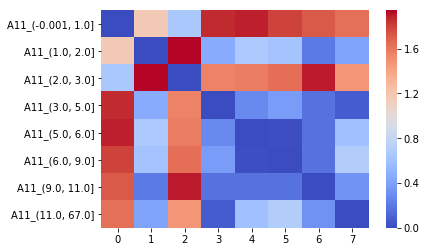

In [15]:
sb.plot_pairwise_distance_between_bins('A11')

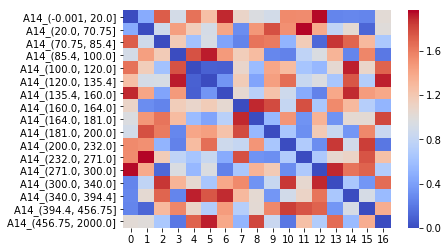

In [16]:
sb.plot_pairwise_distance_between_bins('A14')

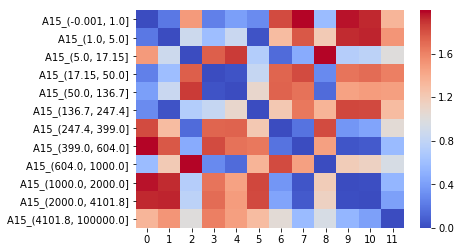

In [17]:
sb.plot_pairwise_distance_between_bins('A15')

In [18]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

A2
['(13.749, 17.92]', '(17.92, 22.58]', '(22.58, 24.464]', '(24.464, 27.145]', '(27.145, 30.093]', '(30.093, 35.436]', '(35.436, 38.25]', '(38.25, 40.866]', '(40.866, 44.008]', '(44.008, 48.58]', '(48.58, 80.25]']
A3
['(-0.001, 0.415]', '(0.415, 0.585]', '(0.585, 1.286]', '(1.286, 1.565]', '(1.565, 3.29]', '(3.29, 6.0]', '(6.0, 7.438]', '(7.438, 9.5]', '(9.5, 14.5]', '(14.5, 28.0]']
A8
['(-0.001, 0.04]', '(0.04, 0.085]', '(0.085, 0.125]', '(0.125, 0.5]', '(0.5, 0.75]', '(0.75, 1.0]', '(1.0, 1.5]', '(1.5, 1.75]', '(1.75, 2.25]', '(2.25, 3.5]', '(3.5, 4.631]', '(4.631, 28.5]']
A11
['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 3.0]', '(3.0, 67.0]']
A14
['(-0.001, 20.0]', '(20.0, 70.75]', '(70.75, 85.4]', '(85.4, 100.0]', '(100.0, 160.0]', '(160.0, 164.0]', '(164.0, 181.0]', '(181.0, 271.0]', '(271.0, 300.0]', '(300.0, 394.4]', '(394.4, 456.75]', '(456.75, 2000.0]']
A15
['(-0.001, 5.0]', '(5.0, 17.15]', '(17.15, 247.4]', '(247.4, 604.0]', '(604.0, 1000.0]', '(1000.0, 100000.0]']


### inter bin distance penalty가 모든 step에서 매번 계산. 특히 #init bin이 많아질수록 더 많은 penalty가 부여되서 최적화를 어렵게 만드는듯함. 

In [12]:
from sklearn.cluster import KMeans

In [ ]:
KMeans